In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
!pip install livelossplot
from livelossplot import PlotLosses
from torch.utils.data import DataLoader


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/src')
from train import train_model
from data_loader import  ReservoirDataset
from model import UNet
from utils import visualize_prediction

In [4]:
!unzip "/content/drive/My Drive/CCS_data.zip" -d "/content/unzipped_files"


Streaming output truncated to the last 5000 lines.
  inflating: /content/unzipped_files/CCS_data/train_data/data_0145.npz  
  inflating: /content/unzipped_files/__MACOSX/CCS_data/train_data/._data_0145.npz  
  inflating: /content/unzipped_files/CCS_data/train_data/data_4323.npz  
  inflating: /content/unzipped_files/__MACOSX/CCS_data/train_data/._data_4323.npz  
  inflating: /content/unzipped_files/CCS_data/train_data/data_2752.npz  
  inflating: /content/unzipped_files/__MACOSX/CCS_data/train_data/._data_2752.npz  
  inflating: /content/unzipped_files/CCS_data/train_data/data_2034.npz  
  inflating: /content/unzipped_files/__MACOSX/CCS_data/train_data/._data_2034.npz  
  inflating: /content/unzipped_files/CCS_data/train_data/data_4445.npz  
  inflating: /content/unzipped_files/__MACOSX/CCS_data/train_data/._data_4445.npz  
  inflating: /content/unzipped_files/CCS_data/train_data/data_0623.npz  
  inflating: /content/unzipped_files/__MACOSX/CCS_data/train_data/._data_0623.npz  
  infla

In [5]:
data_directory = "/content/unzipped_files/CCS_data/train_data/"
train_dataset = ReservoirDataset(data_directory,target_var="pressure_buildup" )
train_data_loader = DataLoader(train_dataset, batch_size=16,shuffle=True)

Processing /content/unzipped_files/CCS_data/train_data/data_4465.npz: 0.00%
Processing /content/unzipped_files/CCS_data/train_data/data_1782.npz: 0.22%
Processing /content/unzipped_files/CCS_data/train_data/data_4342.npz: 0.44%
Processing /content/unzipped_files/CCS_data/train_data/data_2540.npz: 0.67%
Processing /content/unzipped_files/CCS_data/train_data/data_3594.npz: 0.89%
Processing /content/unzipped_files/CCS_data/train_data/data_3790.npz: 1.11%
Processing /content/unzipped_files/CCS_data/train_data/data_2016.npz: 1.33%
Processing /content/unzipped_files/CCS_data/train_data/data_1972.npz: 1.56%
Processing /content/unzipped_files/CCS_data/train_data/data_0994.npz: 1.78%
Processing /content/unzipped_files/CCS_data/train_data/data_1721.npz: 2.00%
Processing /content/unzipped_files/CCS_data/train_data/data_1887.npz: 2.22%
Processing /content/unzipped_files/CCS_data/train_data/data_3659.npz: 2.44%
Processing /content/unzipped_files/CCS_data/train_data/data_0656.npz: 2.67%
Processing /

In [6]:
data_directory2 = "/content/unzipped_files/CCS_data/val_data/"
val_dataset = ReservoirDataset(data_directory2 ,target_var="pressure_buildup")
val_data_loader = DataLoader(val_dataset, batch_size=16,shuffle=False)

Processing /content/unzipped_files/CCS_data/val_data/data_0485.npz: 0.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0105.npz: 2.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0237.npz: 4.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0071.npz: 6.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0092.npz: 8.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0372.npz: 10.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0214.npz: 12.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0255.npz: 14.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0218.npz: 16.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0449.npz: 18.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0232.npz: 20.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0308.npz: 22.00%
Processing /content/unzipped_files/CCS_data/val_data/data_0133.npz: 24.00%
Processing /content/unzipped_f

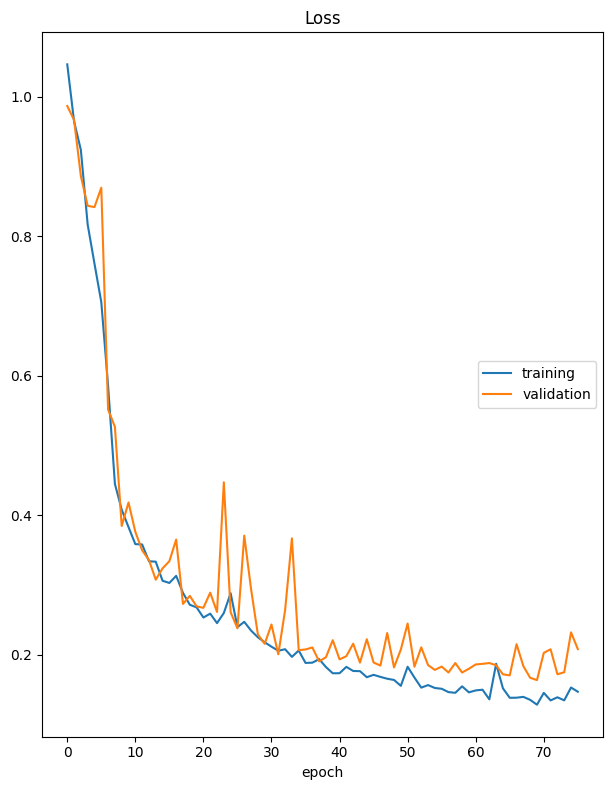

Loss
	training         	 (min:    0.128, max:    1.047, cur:    0.147)
	validation       	 (min:    0.163, max:    0.987, cur:    0.208)


In [ ]:
device_cuda = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=UNet(in_channels = 9,out_channels = 24)
train_model(model, train_data_loader, val_data_loader, device=device_cuda,save_dir = "/content/drive/My Drive/inpainting_model_UNET")

In [7]:
device_cuda = torch.device("cuda" if torch.cuda.is_available() else "cpu")


/content/drive/MyDrive/src/utils.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


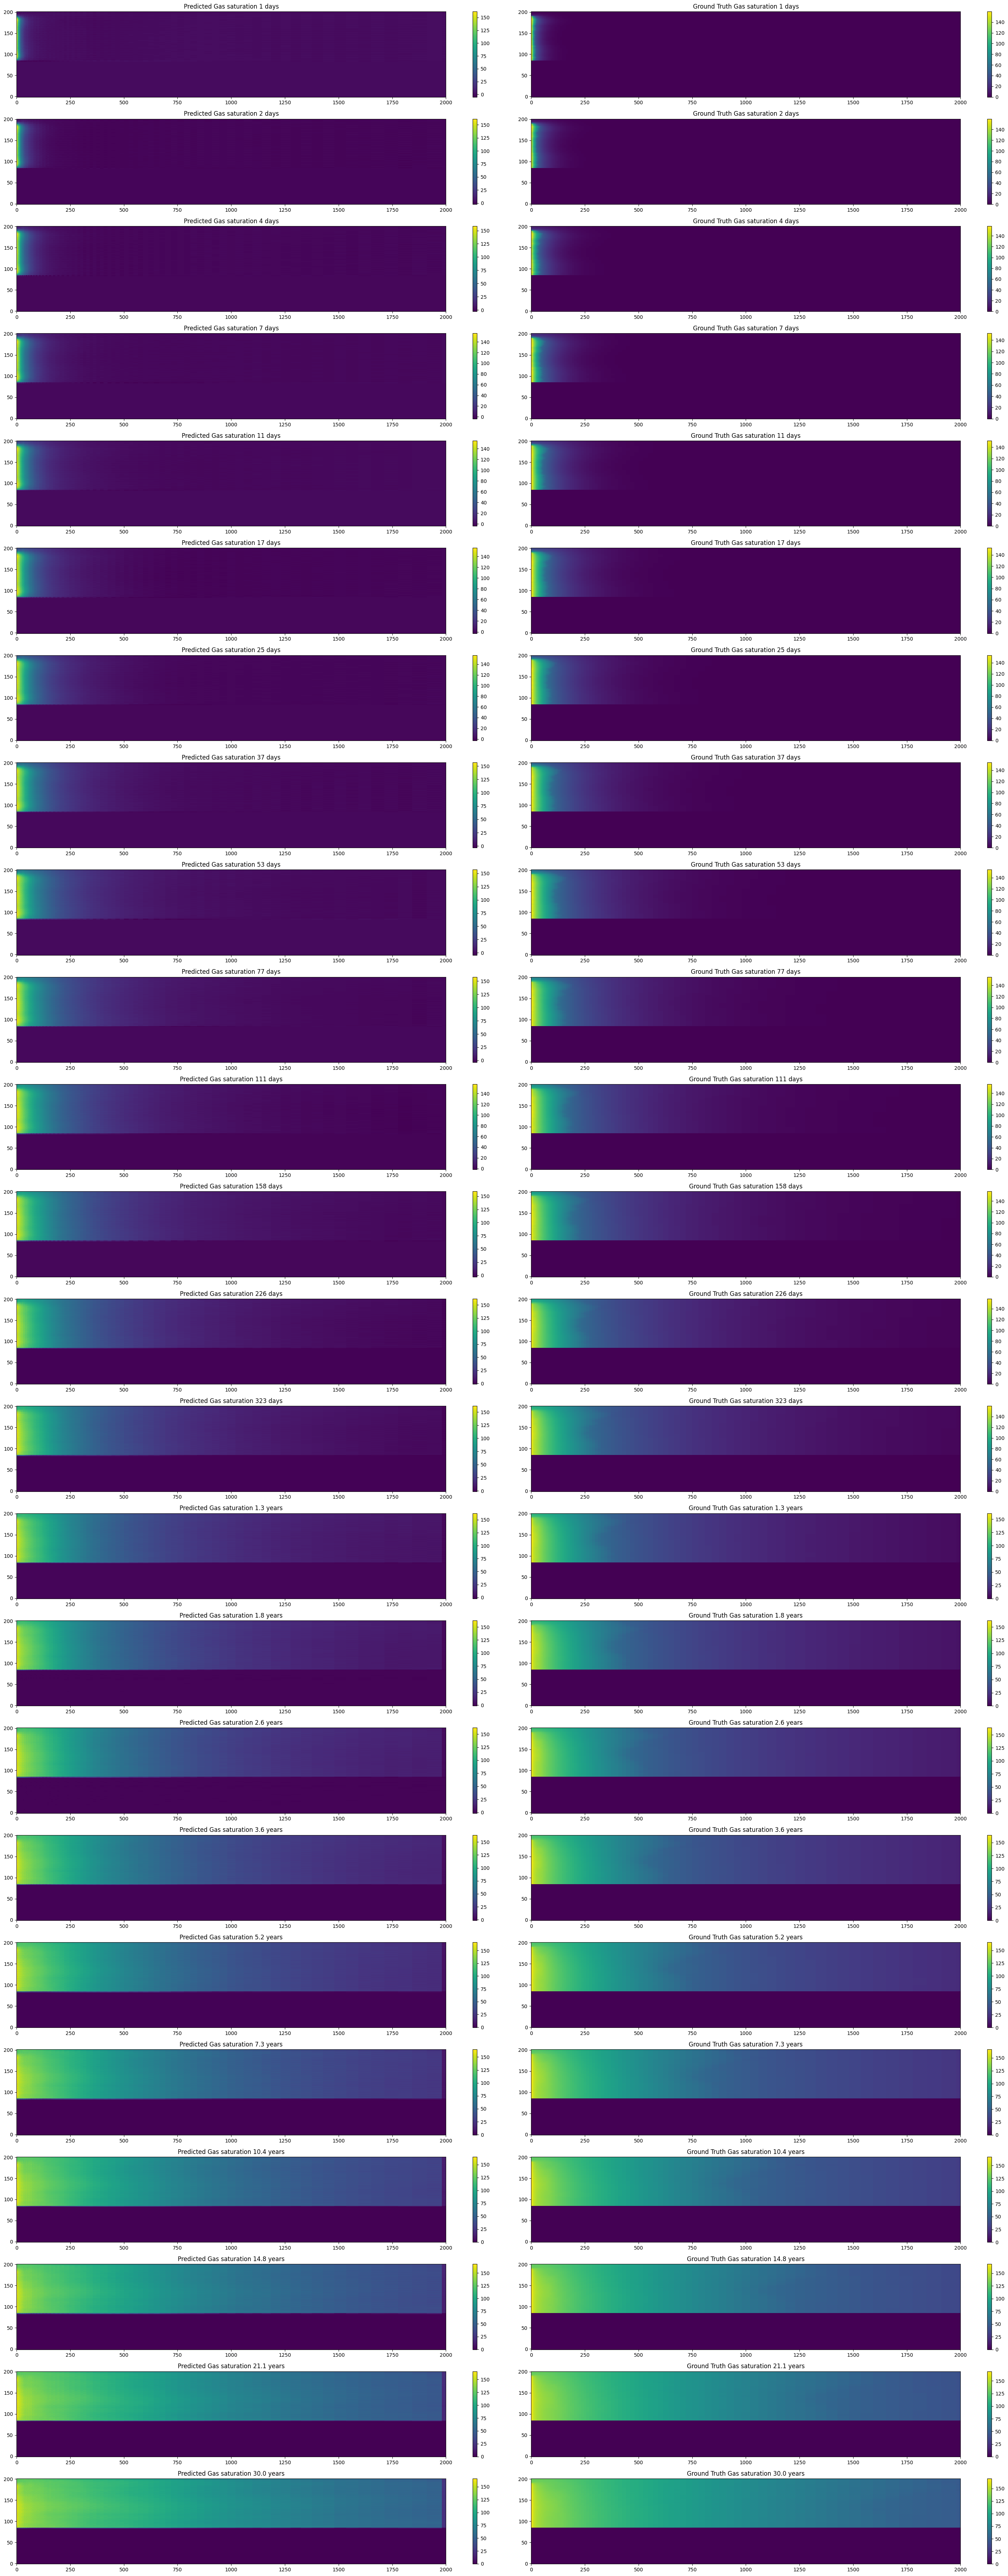

In [8]:
epoch = 60
model=UNet(in_channels = 9,out_channels = 24)
model_path = f"/content/drive/My Drive/inpainting_model_UNET/model_pressureepoch_{epoch}.pth"  # Please specify the path to your saved model
visualize_prediction( "/content/unzipped_files/CCS_data/val_data/", model_path,device_cuda,target_var="pressure_buildup",dl_model=model)